In [35]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [36]:
##importing necessary libraries
import numpy as np
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
import datetime



In [37]:
#step 1:downloading stock data
ticker='AAPL'

#downloading historical data from yahoofinance
data = yf.download(ticker, start="2020-01-01", end=datetime.datetime.today().strftime("%Y-%m-%d"))
data=data[['Close']]

C:\Users\mbugh\AppData\Local\Temp\ipykernel_24072\1155894336.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end=datetime.datetime.today().strftime("%Y-%m-%d"))
[*********************100%***********************]  1 of 1 completed


In [38]:
#step2;preprocess the data
#initialize minmaxscaller to normalize data btn 0 and 1 
#Scale the data for training
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [39]:
##CREATING FEATURES AND TARGETS
#defining training data length as 80%
training_data_len = int(len(scaled_data) * 0.8)
#split the training adata into training set
train_data = scaled_data[0:int(training_data_len), :]






In [40]:
#xtrain and ytrain
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 previous values
    y_train.append(train_data[i, 0])       # next value


In [41]:
#convert list to numpy array for model training
x_train,y_train=np.array(x_train),np.array(y_train)

In [42]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [43]:
#BUILD lstm model
model=Sequential()

In [44]:
#first LSTM layer with 50units and return sequences
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))##droping layer to prevent overfitting


c:\Users\mbugh\AI_ML\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
#second layer
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))#dropout to prevent overfitting


In [46]:
#dense layer with 25units
model.add(Dense(units=25))

In [47]:
#output layer with 2 unit
model.add(Dense(units=1))

In [48]:
# compile the model using "Adam" optimizer and mean squared error loss
model.compile(optimizer="adam", loss="mean_squared_error")



In [49]:
#step5 :train the model with batch size of 1 and 1 epoch
model.fit(x_train, y_train, batch_size=1, epochs=1)


1082/1082 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - loss: 0.0050


In [50]:
#step  6 preparing data for 30days forecast
#taking the last 60dags for the dataset for generating future predictios
last_60_days=scaled_data[-60:]


In [51]:
#reshape the model input shape (1 sample,60timesteps,1feature)
x_future=last_60_days.reshape(1,last_60_days.shape[0],1)

In [52]:
# Step 7 predicting next 30 days
future_predictions = []
for _ in range(30):
    pred = model.predict(x_future)
    future_predictions.append(pred[0,0])  # add prediction to the list
    
    # update x_future with the new prediction
    x_future = np.append(x_future[:,1:,:], [[pred[0]]], axis=1)

# Convert to array
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Convert back to original stock price scale
future_predictions = scaler.inverse_transform(future_predictions)

print("Predicted stock prices for next 30 days:")
print(future_predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━

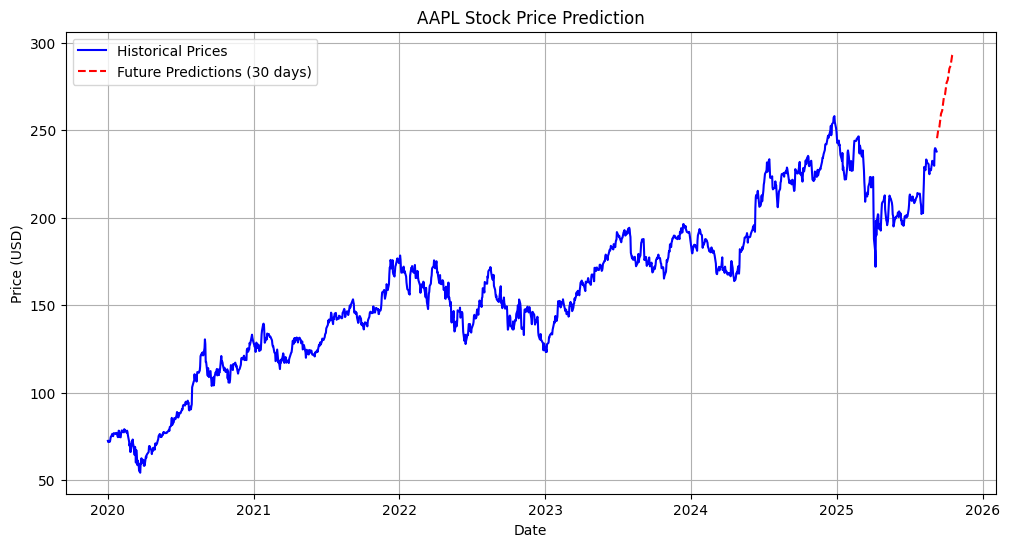

In [ ]:
# Create future dates starting after the last available date in your dataset
forecast_dates = pd.date_range(
    start=data.index[-1] + pd.Timedelta(days=1),
    periods=30,
    freq='B'   # Business days only
)

# Put predictions into a DataFrame
forecast = pd.DataFrame(future_predictions, index=forecast_dates, columns=['Predicted Price'])

# Plot historical stock prices
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Historical Prices', color='blue')

# Plot predicted prices
plt.plot(forecast, label='Future Predictions (30 days)', color='red', linestyle='dashed')

# Add labels and legend
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

# saving plot data
plt.savefig("plot.png", bbox_inches="tight", dpi=150)  # Save plot
plt.show()  # Show plot
